# Worksheet 12

Name: Jonathan Thomas
UID: U81823882

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. yes
2. no
3. yes
4. no

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Classify the data using a method such as KMeans 

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

- Underfitting is where you barely fit a model to the dataset, often leading to incorrectly predicted values. However, it is usually simple, easy to follow and can more readily be applied to new data with similar accuracy.
- Overfitting is where the model attempts to meet every prediction correctly. However, it is more complex and unlikely to perform well with new data with similar accuracy.

### K Nearest Neighbors

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

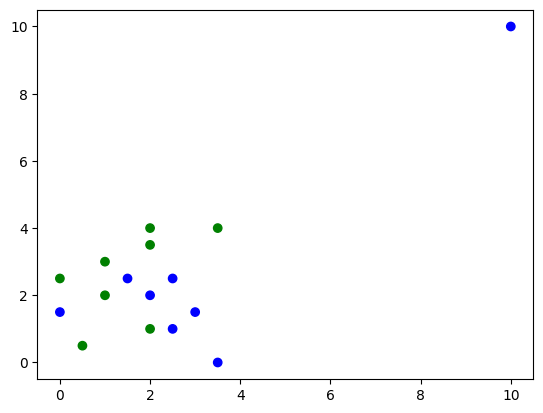

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

(10,10)

In [5]:
for key in data:
    data[key] = data[key][:-1]

print(data)

{'Attribute A': [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0], 'Attribute B': [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5], 'Class': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]}


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

(0, 1.5) & (2, 1)

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

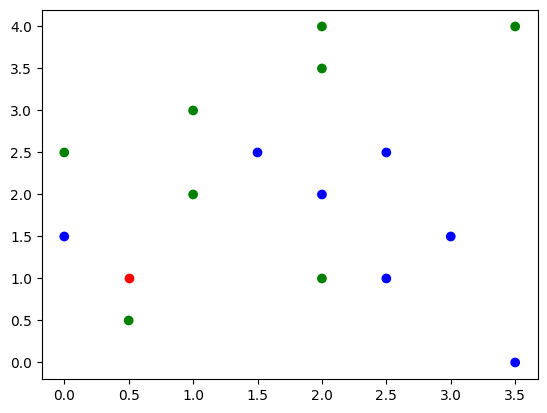

In [7]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter(0.5, 1, color = colors[2])
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

[((0.5, 0.5), 0.5, 1), ((0, 1.5), 0.7071067811865476, 0), ((1, 2), 1.118033988749895, 1)]


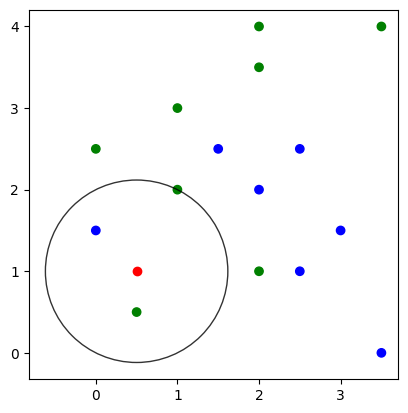

In [40]:
def n_closest_to(data, point, n):
    d = [((data["Attribute A"][i], data["Attribute B"][i]), data["Class"][i]) for i in range(len(data["Attribute A"]))]
    ls = [(d[i][0], euclidean(d[i][0], point), d[i][1]) for i in range(n)]
    for i in range(n, len(d)):
        dist = euclidean(d[i][0], point)
        if (dist < max(ls, key=lambda x: x[1])[1]):
            ls[ls.index(max(ls, key=lambda x: x[1]))] = (d[i][0], dist, d[i][1])
    print(ls)
    return ls

def euclidean(p1, p2):
    return np.sqrt(np.sum((np.array(p2) - np.array(p1))**2))

far = max(n_closest_to(data, (0.5, 1), 3), key=lambda x: x[1])
location = (0.5, 1)
radius = far[1]
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
axes.scatter(0.5, 1, color = colors[2])
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

  

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [41]:
def majority(points):
    sum = 0
    for p in points:
        if p[2] == 0:
            sum += 1
        else:
            sum -= 1
            
    if (sum >= 0):
        print("Class:",0)
        return 0
    else:
        print("Class:",1)
        return 1
    
majority(n_closest_to(data, (0.5, 1), 3))

[((0.5, 0.5), 0.5, 1), ((0, 1.5), 0.7071067811865476, 0), ((1, 2), 1.118033988749895, 1)]
Class: 1


1

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [43]:
import copy
count = 0
for i in range(len(data["Attribute A"])):
    temp = copy.deepcopy(data)
    actual_class = temp["Class"][i]
    for key in temp:
        if i < len(temp[key]):
            del temp[key][i]
    training_set = temp
    #print(training_set)
    prediction = majority(n_closest_to(training_set, (data["Attribute A"][i], data["Attribute B"][i]), 3))
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count/len(data["Attribute A"]))


[((2, 3.5), 1.5811388300841898, 1), ((2.5, 2.5), 1.8027756377319946, 0), ((2, 4), 1.5, 1)]
Class: 1
[((0.5, 0.5), 1.118033988749895, 1), ((1, 2), 1.118033988749895, 1), ((0.0, 2.5), 1.0, 1)]
Class: 1
[((1.5, 2.5), 0.7071067811865476, 0), ((2, 2), 1.0, 0), ((1, 3), 1.0, 1)]
Class: 0
[((2, 2), 1.118033988749895, 0), ((2, 1), 0.5, 1), ((3, 1.5), 0.7071067811865476, 0)]
Class: 0
[((2, 4), 0.5, 1), ((1.5, 2.5), 1.118033988749895, 0), ((1, 3), 1.118033988749895, 1)]
Class: 1
[((2, 2), 0.7071067811865476, 0), ((1, 3), 0.7071067811865476, 1), ((1, 2), 0.7071067811865476, 1)]
Class: 1
[((2.5, 1), 0.5, 0), ((3, 1.5), 1.118033988749895, 0), ((2, 2), 1.0, 0)]
Class: 0
[((2.5, 1), 1.4142135623730951, 0), ((2, 1), 1.8027756377319946, 1), ((3, 1.5), 1.5811388300841898, 0)]
Class: 0
[((2, 3.5), 1.118033988749895, 1), ((1.5, 2.5), 0.7071067811865476, 0), ((1, 2), 1.0, 1)]
Class: 1
[((2, 2), 1.118033988749895, 0), ((2.5, 1), 0.7071067811865476, 0), ((2, 1), 1.118033988749895, 1)]
Class: 0
[((3.5, 4), 1.

## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [45]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Split dataset into features (X) and labels (y)
X, y = mnist.data, mnist.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train)





       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
57050       0       0       0       0       0       0       0       0       0   
66119       0       0       0       0       0       0       0       0       0   
2762        0       0       0       0       0       0       0       0       0   
6182        0       0       0       0       0       0       0       0       0   
35804       0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
49100       0       0       0       0       0       0       0       0       0   
20609       0       0       0       0       0       0       0       0       0   
21440       0       0       0       0       0       0       0       0       0   
50057       0       0       0       0       0       0       0       0       0   
5192        0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies = {}
test_accuracies = {}

for k in range(1, 21):
    # Initialize KNN classifier with current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = knn_classifier.predict(X_train)
    
    # Make predictions on the test data
    y_test_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy on training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate accuracy on test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store accuracies in dictionaries
    train_accuracies[k] = train_accuracy
    test_accuracies[k] = test_accuracy

    # Print accuracy for the current k value
    print(f"Accuracy for k={k}: Train Accuracy={train_accuracy:.4f}, Test Accuracy={test_accuracy:.4f}")

# Print best k value based on test accuracy
best_k = max(test_accuracies, key=test_accuracies.get)
print(f"Best k value based on test accuracy: {best_k}")



Accuracy for k=1: Train Accuracy=1.0000, Test Accuracy=0.9724
Accuracy for k=2: Train Accuracy=0.9855, Test Accuracy=0.9676
Accuracy for k=3: Train Accuracy=0.9863, Test Accuracy=0.9722
Accuracy for k=4: Train Accuracy=0.9825, Test Accuracy=0.9709
Accuracy for k=5: Train Accuracy=0.9810, Test Accuracy=0.9721
Accuracy for k=6: Train Accuracy=0.9786, Test Accuracy=0.9711
Accuracy for k=7: Train Accuracy=0.9778, Test Accuracy=0.9711
Accuracy for k=8: Train Accuracy=0.9760, Test Accuracy=0.9696
Accuracy for k=9: Train Accuracy=0.9752, Test Accuracy=0.9687
Accuracy for k=10: Train Accuracy=0.9740, Test Accuracy=0.9681
Accuracy for k=11: Train Accuracy=0.9733, Test Accuracy=0.9672
Accuracy for k=12: Train Accuracy=0.9721, Test Accuracy=0.9667
Accuracy for k=13: Train Accuracy=0.9716, Test Accuracy=0.9656
Accuracy for k=14: Train Accuracy=0.9702, Test Accuracy=0.9658
Accuracy for k=15: Train Accuracy=0.9696, Test Accuracy=0.9642
Accuracy for k=16: Train Accuracy=0.9692, Test Accuracy=0.9636
A

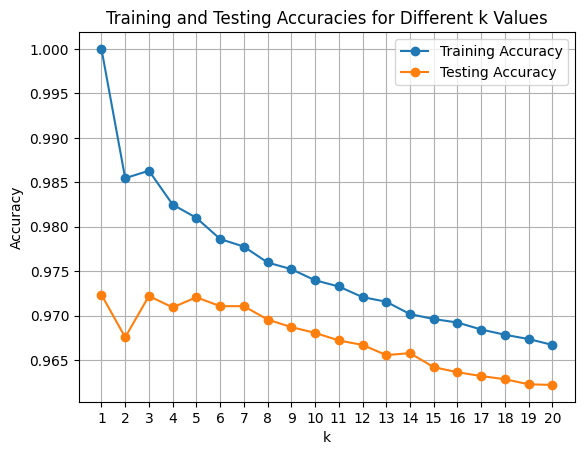

In [49]:
k_values = [k for k in range(1, 21)]

# Plot the graph
plt.plot(k_values, list(train_accuracies.values()), marker='o', label='Training Accuracy')
plt.plot(k_values, list(test_accuracies.values()), marker='o', label='Testing Accuracy')

# Add labels and title
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies for Different k Values')
plt.xticks(k_values)  # Show all k values on x-axis
plt.grid(True)
plt.legend()

# Show plot
plt.show()

- k=1 is significantly better than the rest which may mean the data is being overfitted
- the next best one k=3 might be the overall best fit

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(dimensionality_reduction, knn_model)
model.fit(...)

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

I decided to run this with all the data substituting empty data with average values.

Submission link: https://www.kaggle.com/competitions/titanic/

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

avg_train_age = train['Age'].mean()
avg_test_age = test['Age'].mean()

avg_train_fare = train['Fare'].mean()
avg_test_fare = test['Fare'].mean()
#print(avg_age)

# Replace empty values in the column with the calculated average
train['Age'].fillna(avg_train_age, inplace=True)
test['Age'].fillna(avg_test_age, inplace=True)

train['Fare'].fillna(avg_train_age, inplace=True)
test['Fare'].fillna(avg_test_age, inplace=True)

train['Sex'] = train['Sex'].replace({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].replace({'male': 0, 'female': 1})

#features = df[['Pclass', 'Sex', 'Age']].to_numpy()
train_features = train[['Sex', 'Pclass']]
test_features = test[['Sex', 'Pclass']]

#labels = df['Survived'].to_numpy()
train_labels = train['Survived']

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(train_features, train_labels)

# Make predictions on the testing data
predictions = knn_classifier.predict(test_features)

predictions_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})

predictions_df.to_csv('predictions.csv', index=False)